In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
df = pd.read_csv("full_mag_insulators.csv")

In [17]:
df.head()

material_id formula  band_gap ordering  numberofelements  density_atomic  \
0    mp-11107   Ac2O3    3.5226       NM                 2       18.302245   
1   mp-977351   Ac2S3    3.0275       NM                 2       32.846489   
2  mp-1183115  AcAlO3    4.1024       NM                 3       11.490283   
3    mp-27972   AcBr3    4.1033       NM                 2       34.116118   
4    mp-30274   AcBrO    4.2410       NM                 3       23.356568   

                              elements      volume  nsites composition  ...  \
0              [Element Ac, Element O]   91.511224       5      Ac2 O3  ...   
1              [Element Ac, Element S]  328.464893      10      Ac4 S6  ...   
2  [Element Ac, Element Al, Element O]   57.451413       5  Ac1 Al1 O3  ...   
3             [Element Ac, Element Br]  272.928947       8     Ac2 Br6  ...   
4  [Element Ac, Element Br, Element O]  140.139410       6  Ac2 Br2 O2  ...   

    density                                           symmetry  \
0  9.109130  crystal_system=<CrystalSystem.trig: 'Trigonal'...   
1  5.562971  crystal_system=<CrystalSystem.trig: 'Trigonal'...   
2  8.728230  crystal_system=<CrystalSystem.cubic: 'Cubic'> ...   
3  5.679086  crystal_system=<CrystalSystem.hex_: 'Hexagonal...   
4  7.652290  crystal_system=<CrystalSystem.tet: 'Tetragonal...   

                                           structure    efermi      cbm  \
0  Full Formula (Ac2 O3)\nReduced Formula: Ac2O3\...  4.696451   8.1122   
1  Full Formula (Ac4 S6)\nReduced Formula: Ac2S3\...  3.008090   5.9344   
2  Full Formula (Ac1 Al1 O3)\nReduced Formula: Ac...  6.948866  10.9060   
3  Full Formula (Ac2 Br6)\nReduced Formula: AcBr3...  1.176334   5.1408   
4  Full Formula (Ac2 Br2 O2)\nReduced Formula: Ac...  3.299849   7.4418   

      vbm  formation_energy_per_atom  energy_above_hull  is_gap_direct  \
0  4.5896                  -3.737668             0.0000          False   
1  2.9069                  -2.440364             0.0527          False   
2  6.8036                  -3.690019             0.0000           True   
3  1.0375                  -2.494519             0.0000          False   
4  3.2008                  -3.396186             0.0000           True   

   is_stable  
0       True  
1      False  
2       True  
3       True  
4       True  

[5 rows x 21 columns]

In [2]:
data_length = len(df)
print(f"Data length: {data_length}")

Data length: 154803


In [7]:
print(df['ordering'].unique())
non_magnetic_length = len(df[df['ordering'] == 'NM'])
print(f"Non-magnetic length: {non_magnetic_length}")
ferromagnetic_length = len(df[df['ordering'] == 'FM'])
print(f"Ferromagnetic length: {ferromagnetic_length}")  
antiferromagnetic_length = len(df[df['ordering'] == 'AFM'])
print(f"Antiferromagnetic length: {antiferromagnetic_length}")  
ferrimagnetic_length = len(df[df['ordering'] == 'FiM'])
print(f"Ferrimagnetic length: {ferrimagnetic_length}")

['NM' 'FM' 'AFM' 'FiM']
Non-magnetic length: 83355
Ferromagnetic length: 56688
Antiferromagnetic length: 3415
Ferrimagnetic length: 11345


In [22]:
elements = df['elements']
elements.head()

0                [Element Ac, Element O]
1                [Element Ac, Element S]
2    [Element Ac, Element Al, Element O]
3               [Element Ac, Element Br]
4    [Element Ac, Element Br, Element O]
Name: elements, dtype: object

C:\Users\dovak\AppData\Local\Temp\ipykernel_24420\2521506766.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='feature', y='mean_value', palette='viridis')
C:\Users\dovak\AppData\Local\Temp\ipykernel_24420\2521506766.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='feature', y='mean_value', palette='viridis')
C:\Users\dovak\AppData\Local\Temp\ipykernel_24420\2521506766.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plot_df, x='feature', y='mean_value', palette='viridis')
C:\Users\dovak\AppD

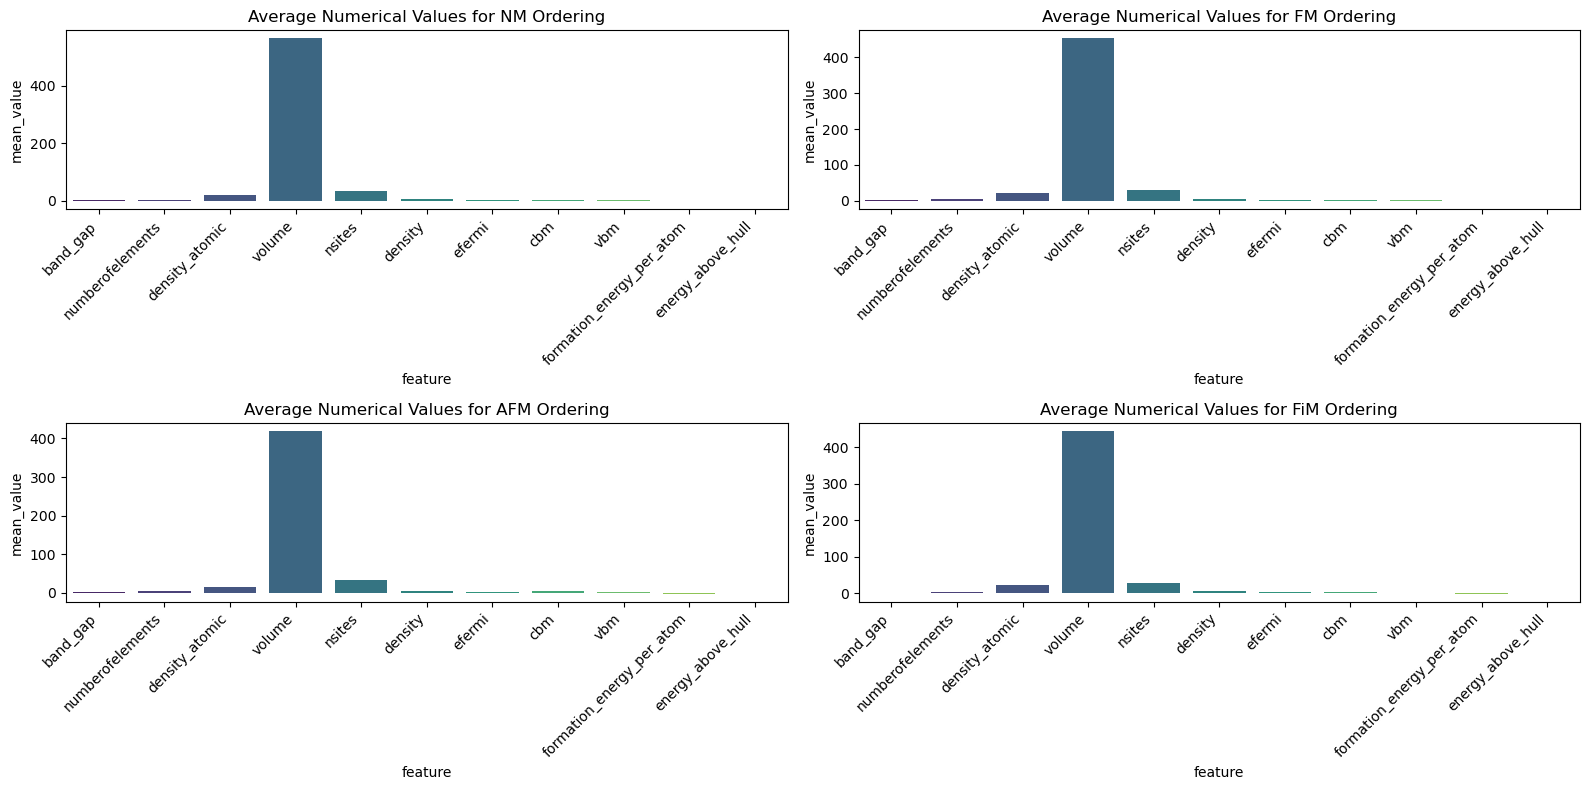

In [16]:
# plot the average value of numerical columns for each ordering type
columns = df.columns.tolist()
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
ordering_types = df['ordering'].unique()

plt.figure(figsize=(16, 8))

for idx, ordering in enumerate(ordering_types):
    means = df[df['ordering'] == ordering][numerical_columns].mean()
    plot_df = pd.DataFrame({
        'feature': means.index,
        'mean_value': means.values
    })
    plt.subplot(2, 2, idx + 1)
    sns.barplot(data=plot_df, x='feature', y='mean_value', palette='viridis')
    plt.title(f'Average Numerical Values for {ordering} Ordering')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
    

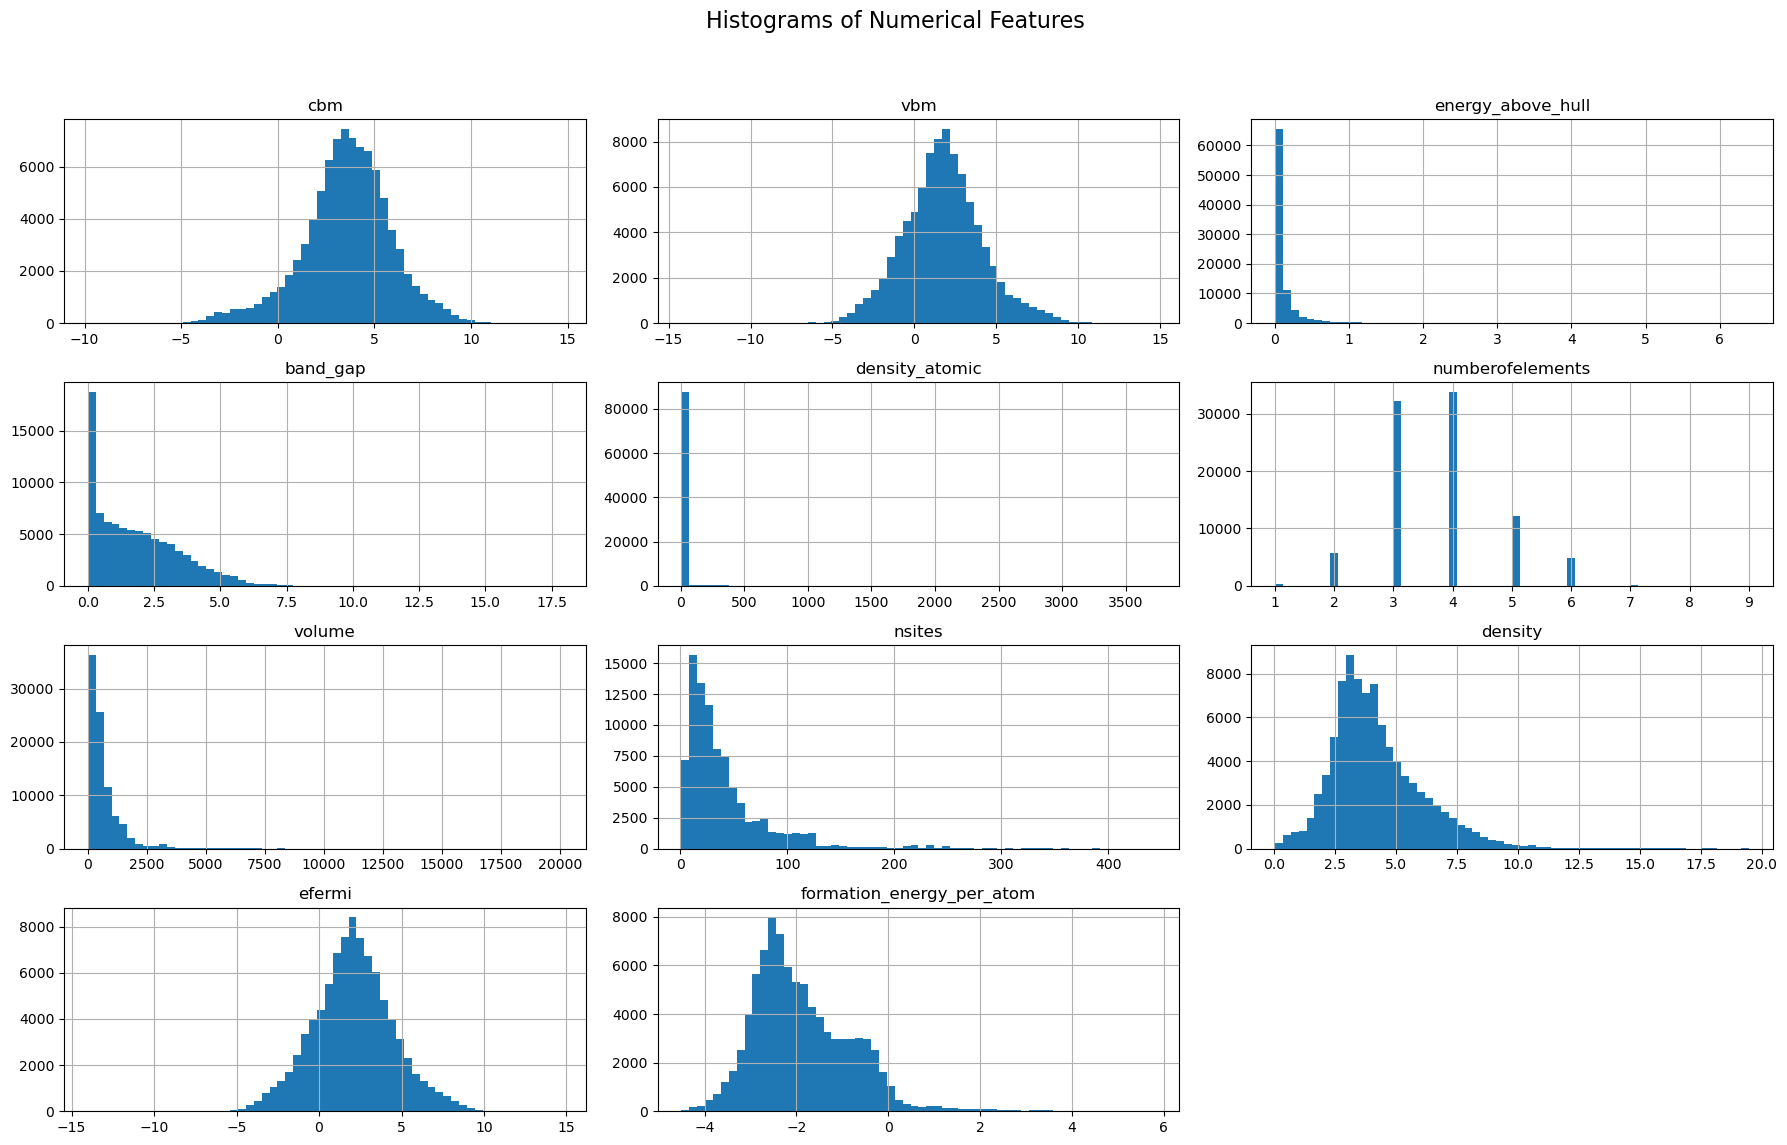

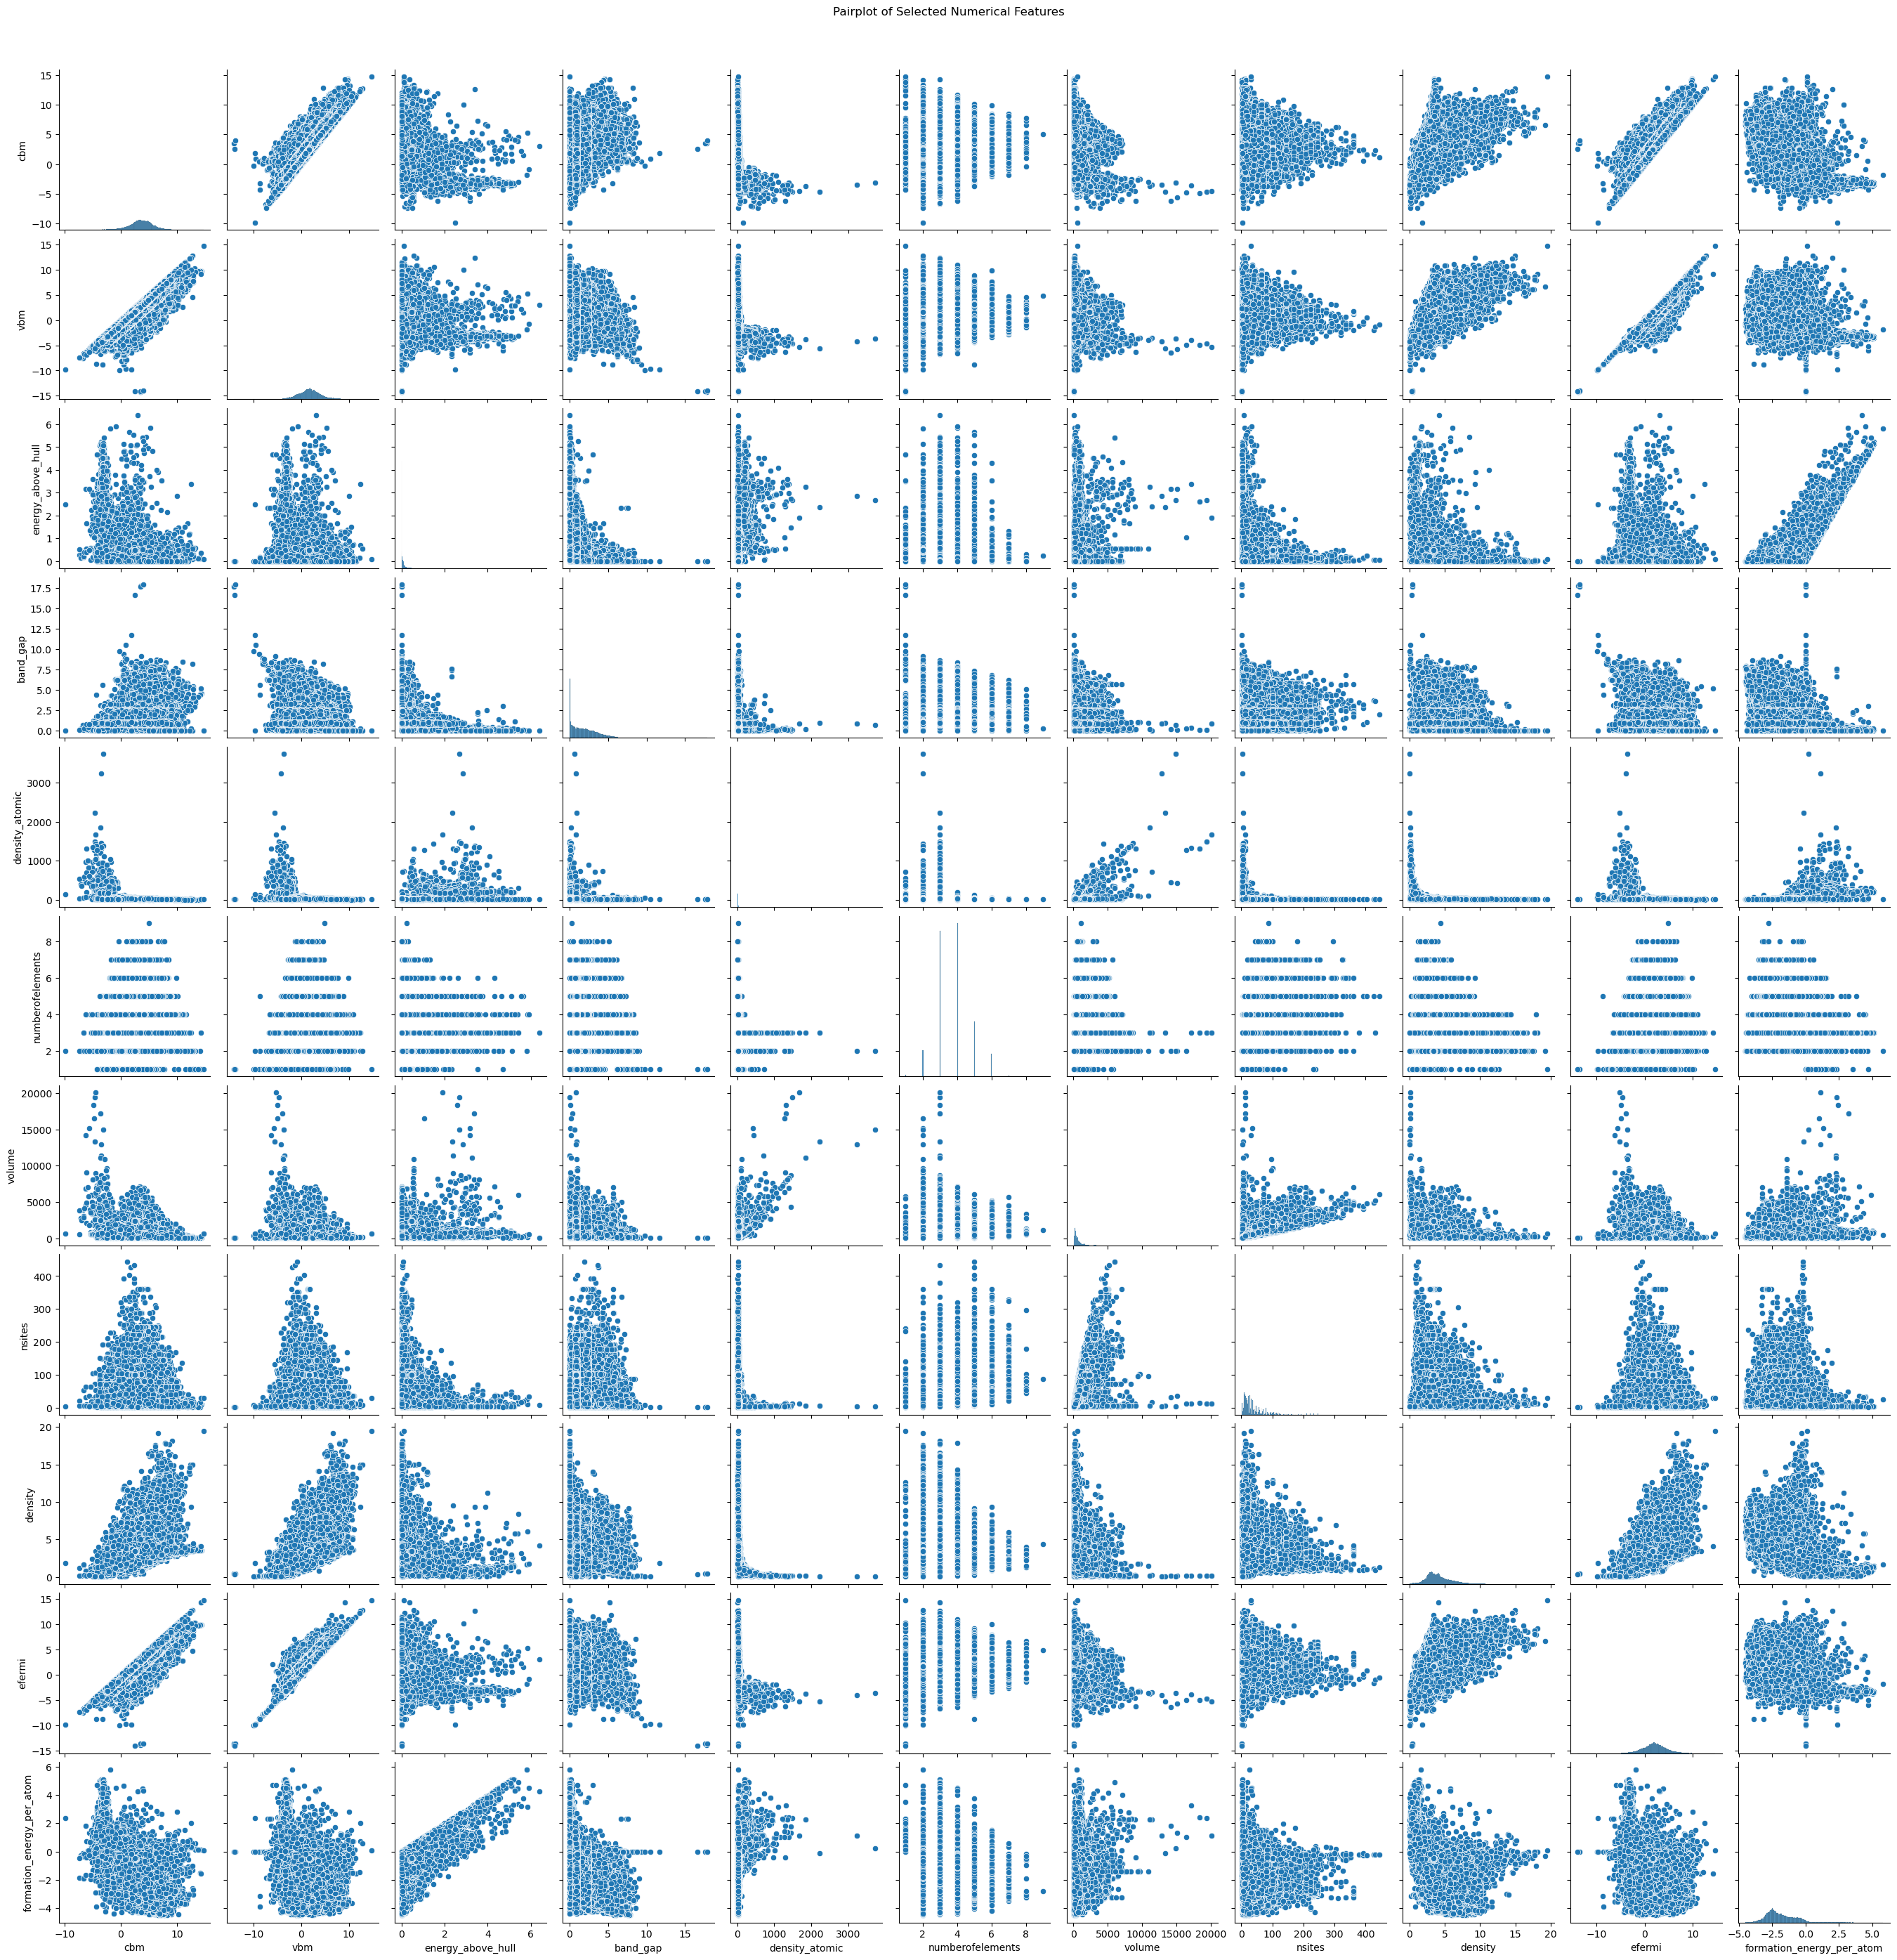

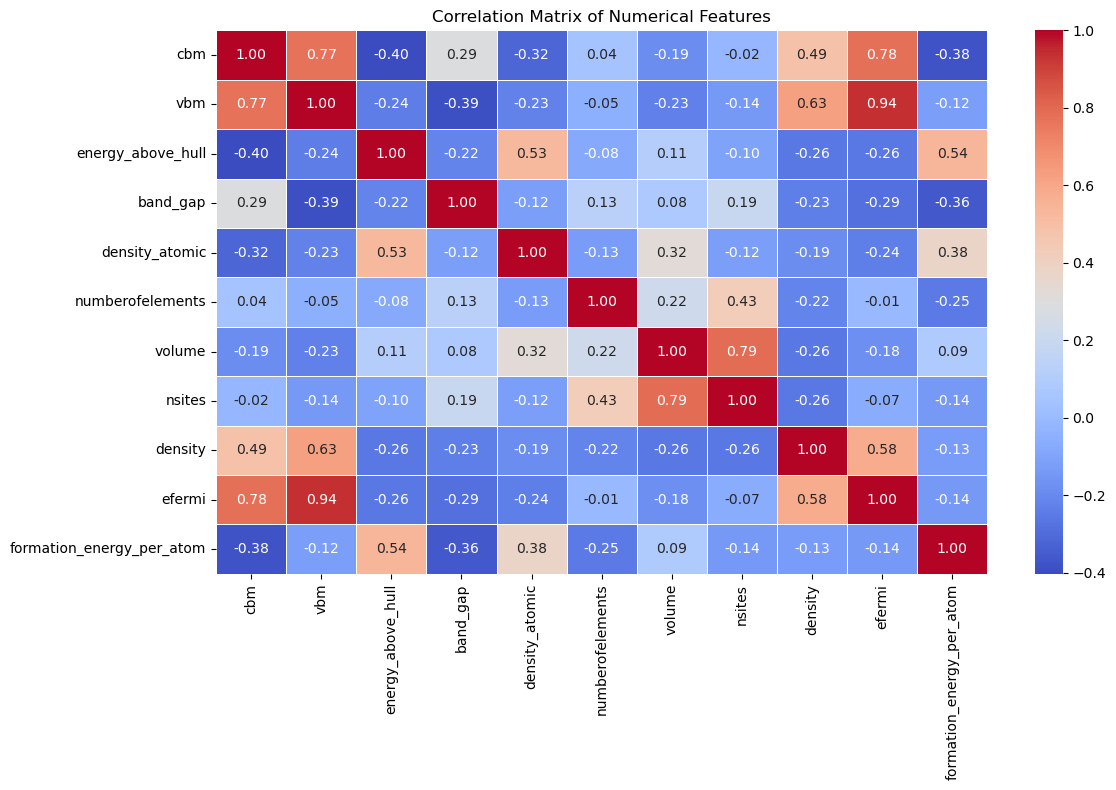

In [ ]:

# Select numerical features
numerical_features = [
    "cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
    "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"
]

# Drop rows with missing values in those features
df_num = df[numerical_features].dropna()

# Plot histograms for each numerical feature
df_num.hist(bins=60 , figsize=(18, 12), layout=(4, 3))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Pairplot for first few numerical features (to avoid overload)
sns.pairplot(df_num[numerical_features[:11]])
plt.suptitle("Pairplot of Selected Numerical Features", y=1.02)
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


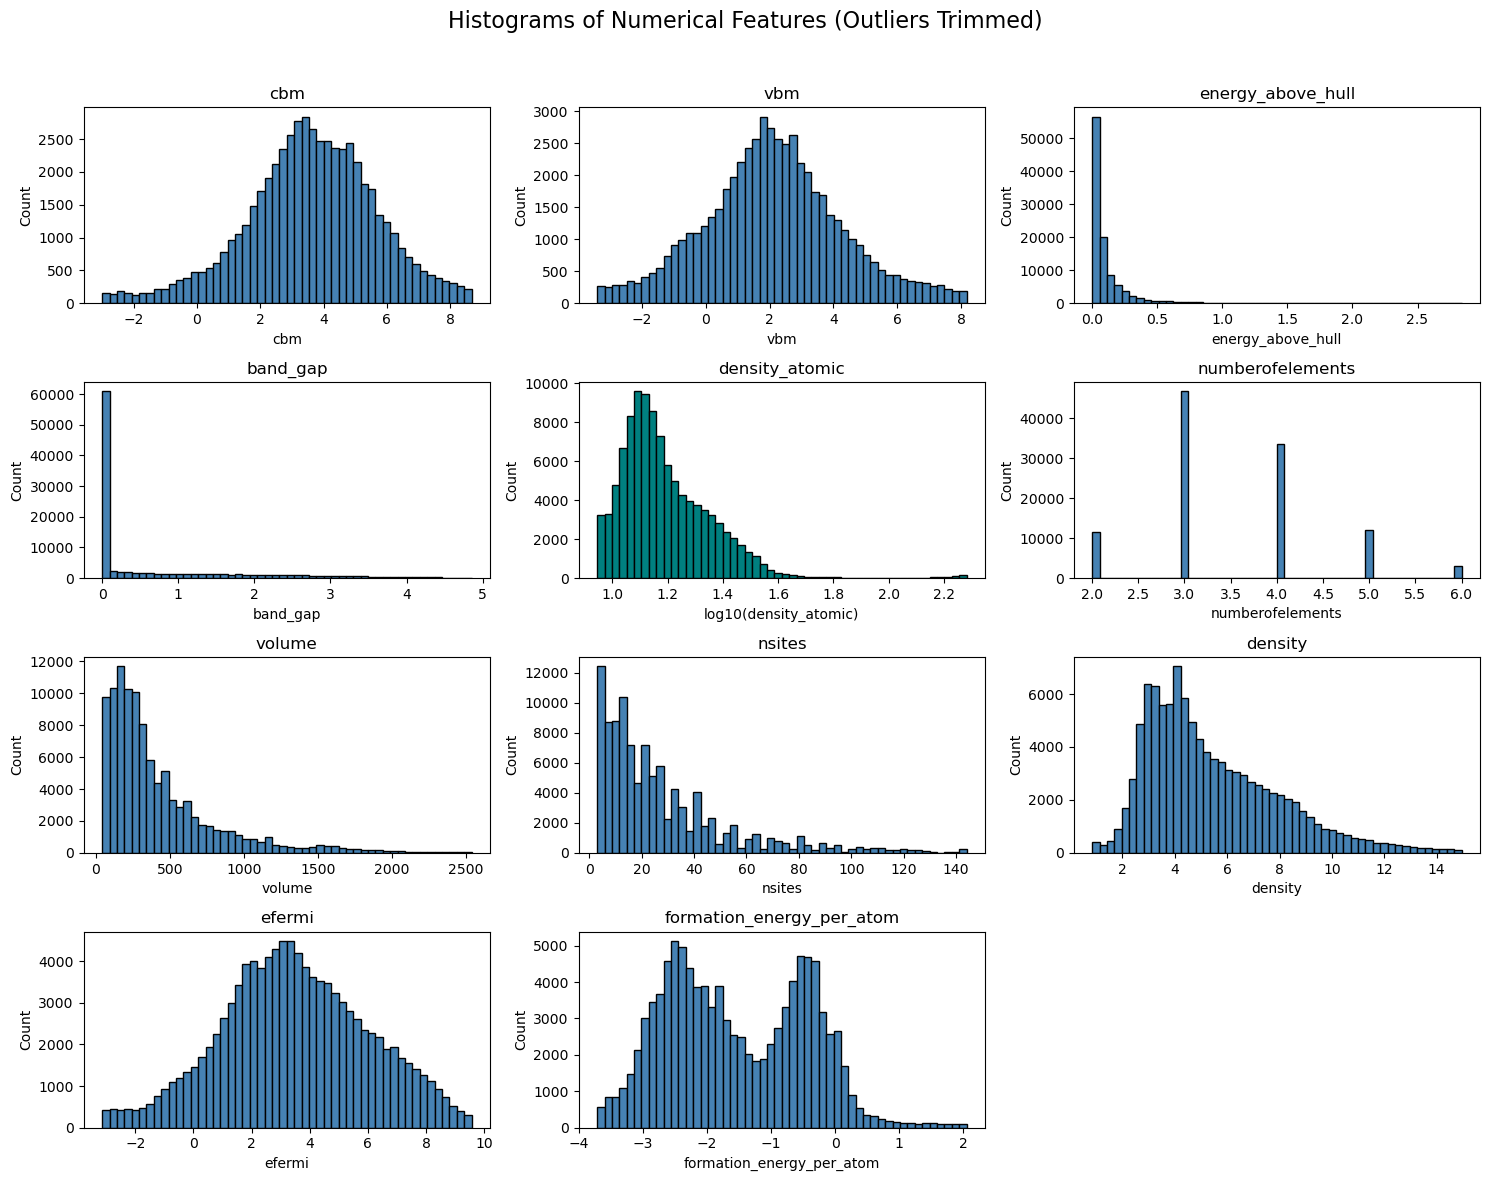

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# List of numerical features
features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]

fig, axs = plt.subplots(4, 3, figsize=(15, 12))
axs = axs.flatten()

for i, feature in enumerate(features):
    data = df[feature].dropna()

    # Apply log scale only to density_atomic
    if feature == "density_atomic":
        data = data[data > 0]
        data_log = np.log10(data)
        low, high = np.percentile(data_log, [1, 99])
        axs[i].hist(data_log, bins=50, color="teal", edgecolor="black", range=(low, high))
        axs[i].set_xlabel("log10(density_atomic)")
    else:
        low, high = np.percentile(data, [1, 99])
        axs[i].hist(data, bins=50, color="steelblue", edgecolor="black", range=(low, high))
        axs[i].set_xlabel(feature)
    
    axs[i].set_ylabel("Count")
    axs[i].set_title(feature)

# Hide unused subplot if any
for j in range(len(features), len(axs)):
    axs[j].axis("off")

fig.suptitle("Histograms of Numerical Features (Outliers Trimmed)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


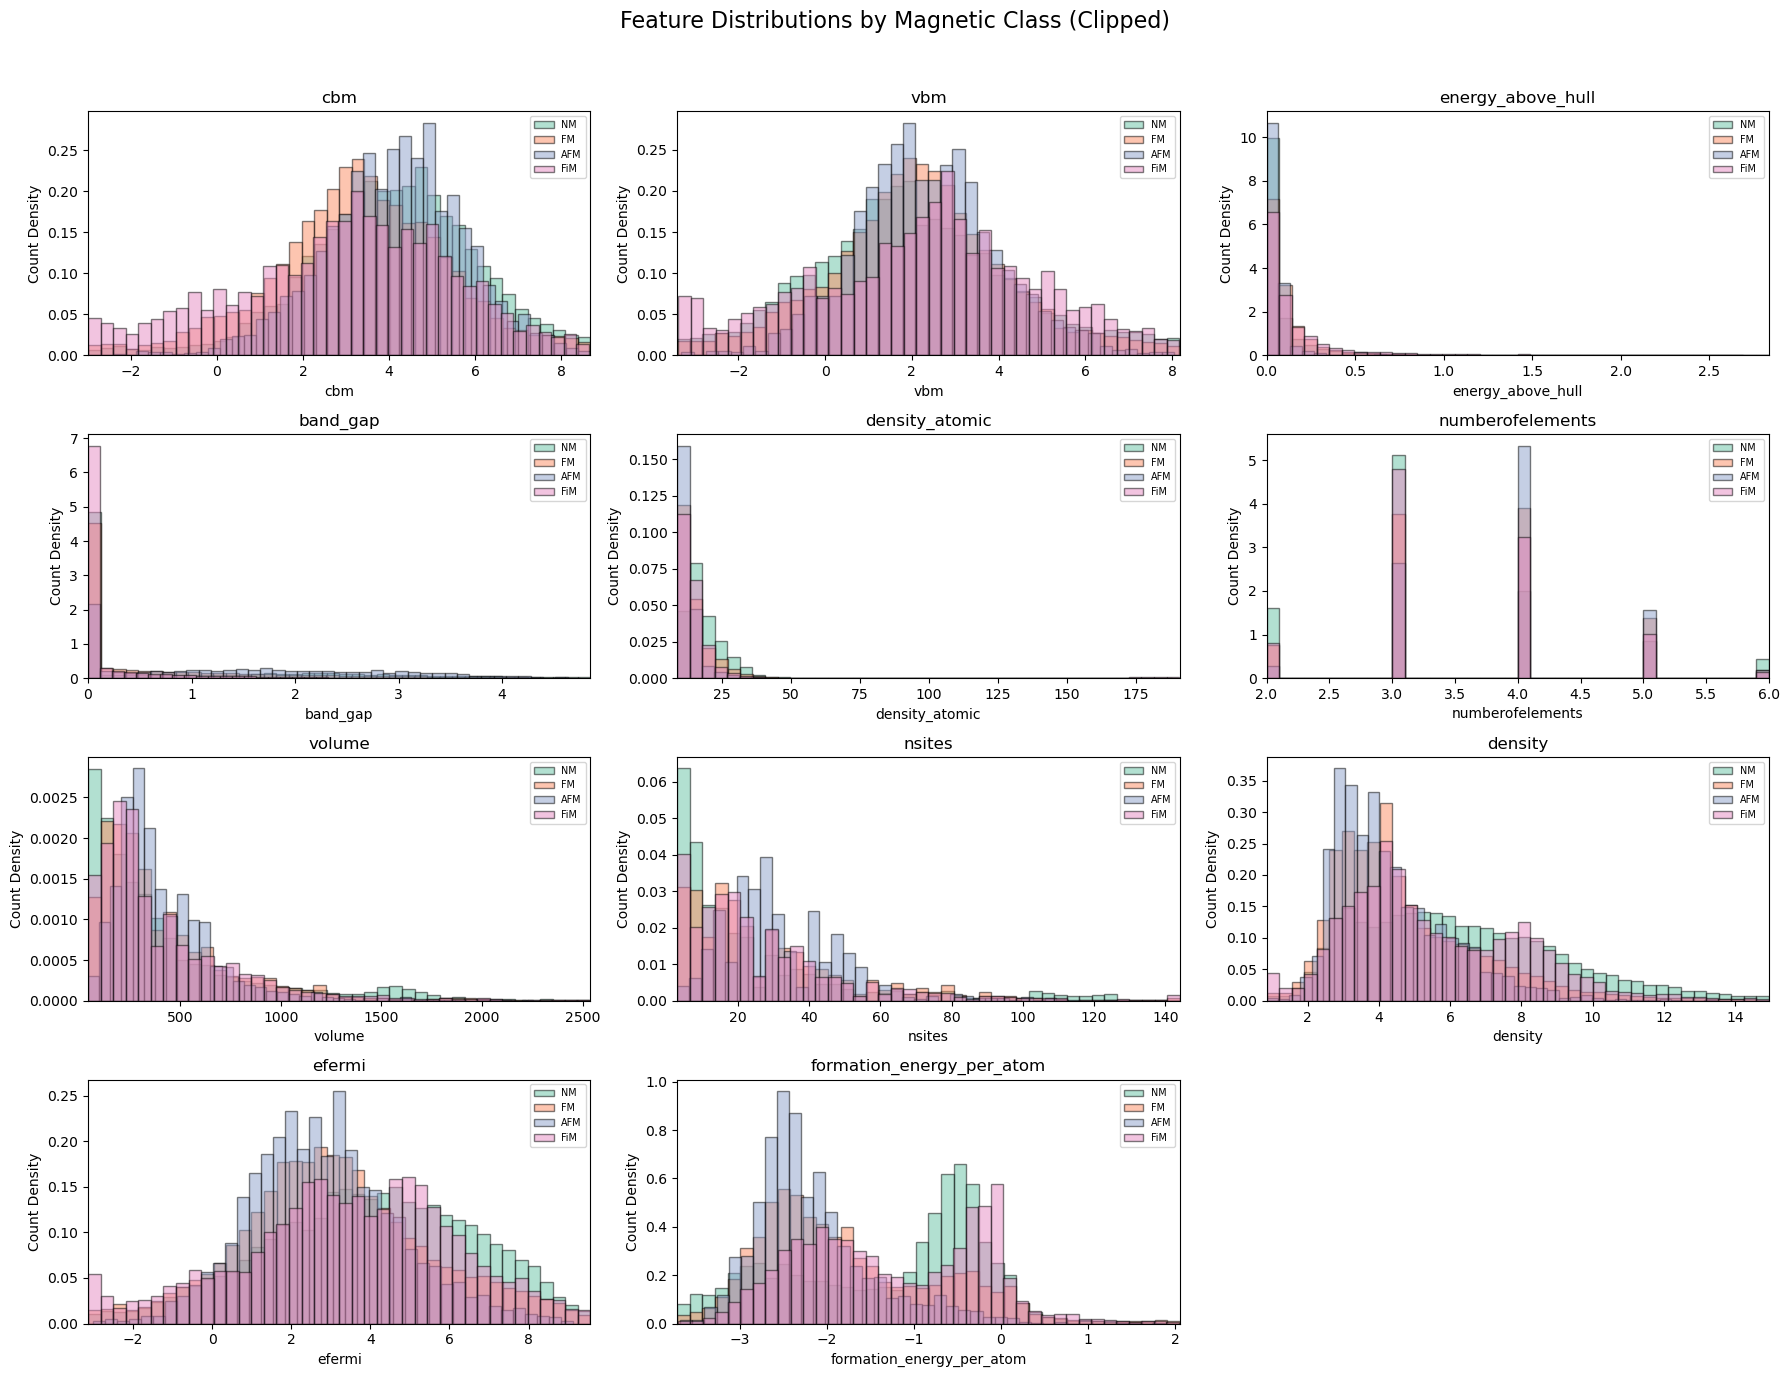

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Numerical features
features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]

classes = df["ordering"].unique()
colors = sns.color_palette("Set2", len(classes))  # One color per class

ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(18, 14))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]

    # Compute tight x-axis limits based on all data (1st to 99th percentile)
    full_data = df[feature].dropna()
    xmin, xmax = np.percentile(full_data, [1, 99])
    
    for cls, color in zip(classes, colors):
        subset = df[df["ordering"] == cls][feature].dropna()
        clipped = subset[(subset >= xmin) & (subset <= xmax)]

        ax.hist(clipped, bins=40, alpha=0.5, label=cls, color=color, edgecolor="black", density=True)

    ax.set_xlim(xmin, xmax)
    ax.set_title(feature)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count Density")
    ax.legend(fontsize="x-small")

# Hide unused subplots
for j in range(len(features), len(axs)):
    axs[j].axis("off")

plt.suptitle("Feature Distributions by Magnetic Class (Clipped)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


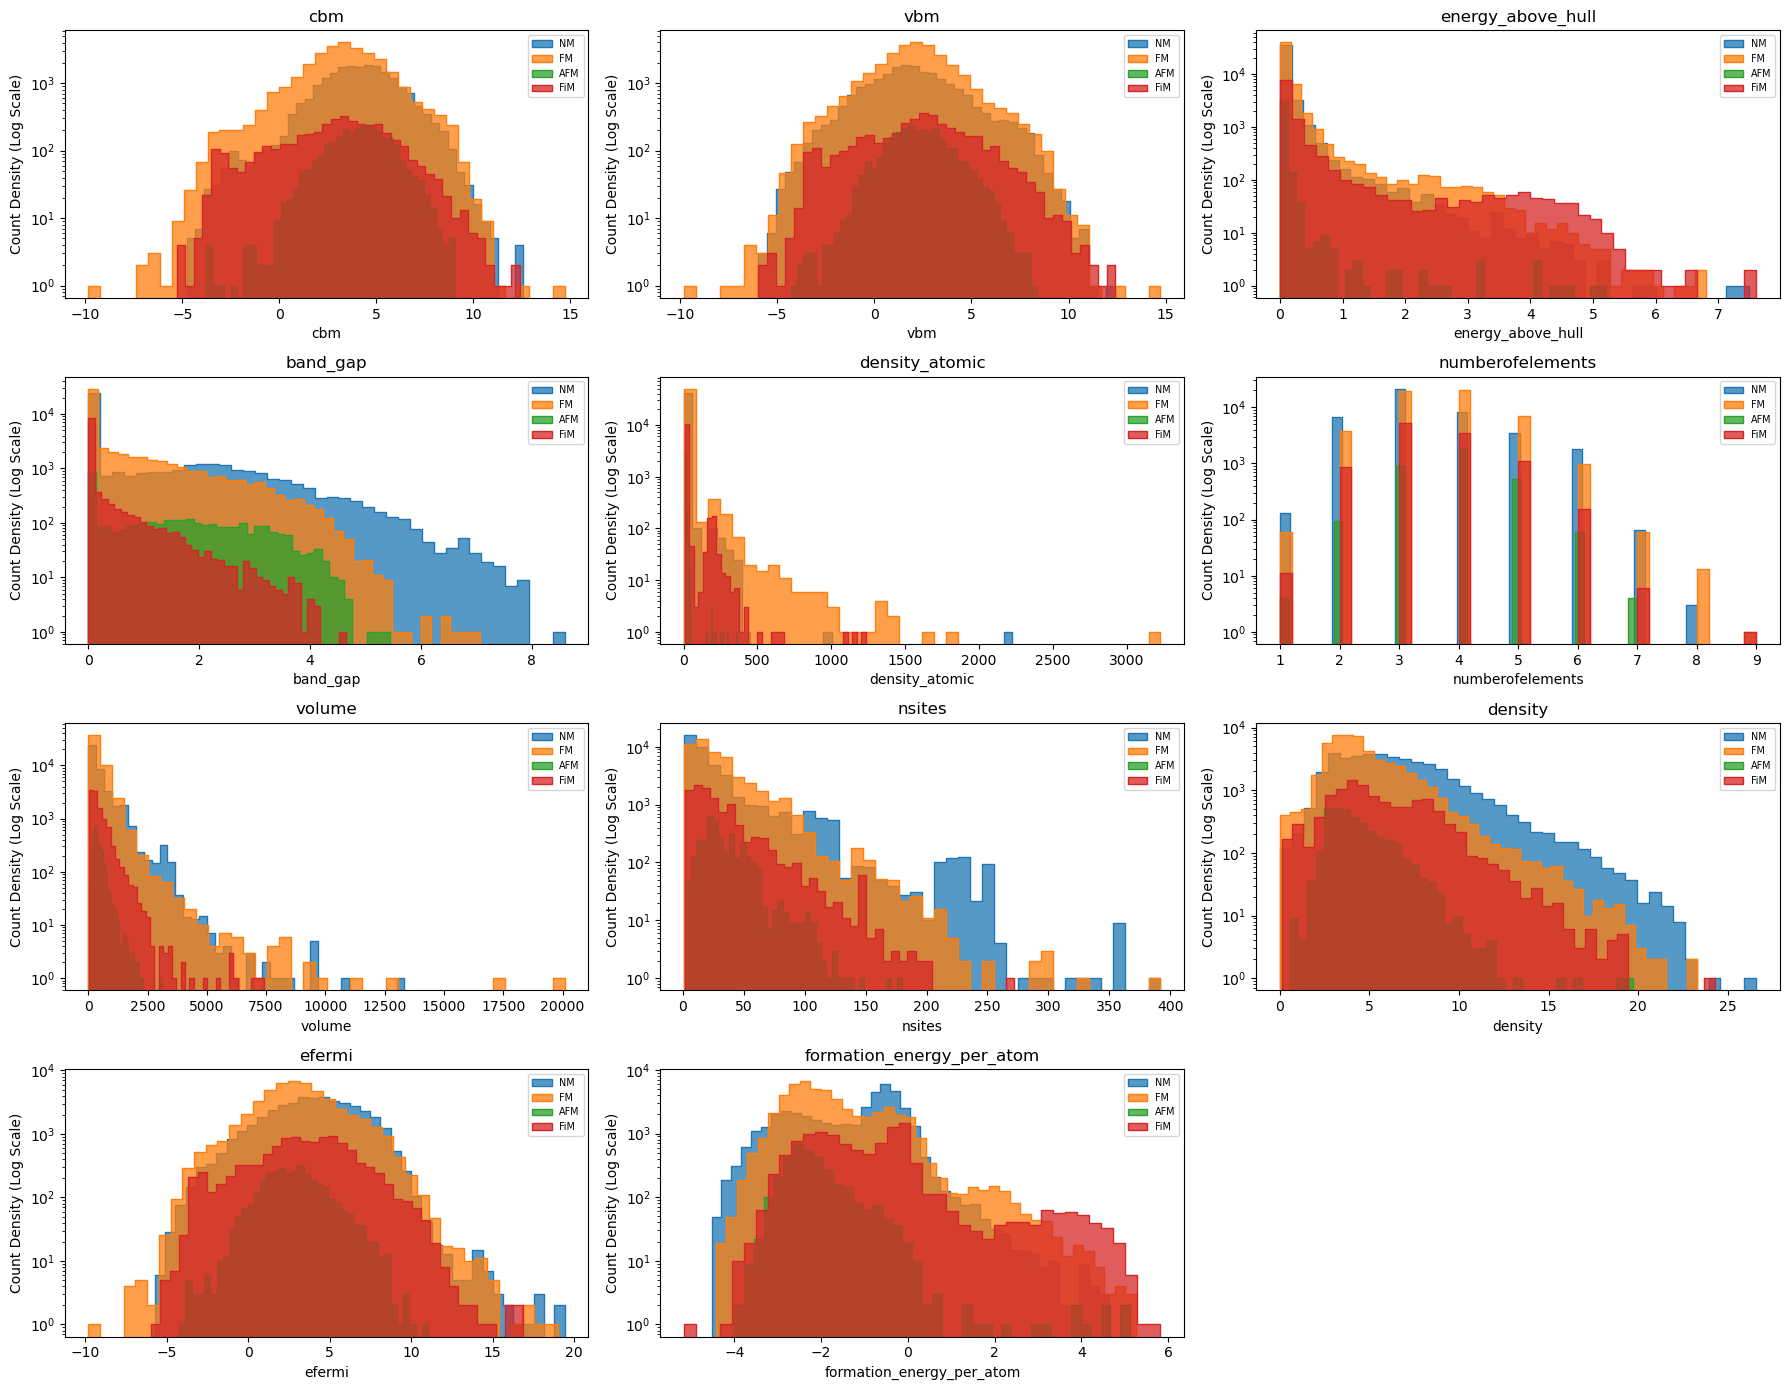

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]
classes = df["ordering"].unique()

ncols = 3
nrows = int(np.ceil(len(features) / ncols))
fig, axs = plt.subplots(nrows, ncols, figsize=(18, 14))
axs = axs.flatten()

for i, feature in enumerate(features):
    ax = axs[i]
    for cls in classes:
        vals = df[df["ordering"] == cls][feature].dropna()
        sns.histplot(vals, bins=40, element="step", label=cls, ax=ax, log_scale=(False, True))
    ax.set_title(feature)
    ax.legend(fontsize="x-small")

for j in range(len(features), len(axs)):
    axs[j].axis("off")

  
for ax in axs:
    ax.set_ylabel("Count Density (Log Scale)")
    ax.set_yscale("log")
plt.tight_layout()
plt.show()


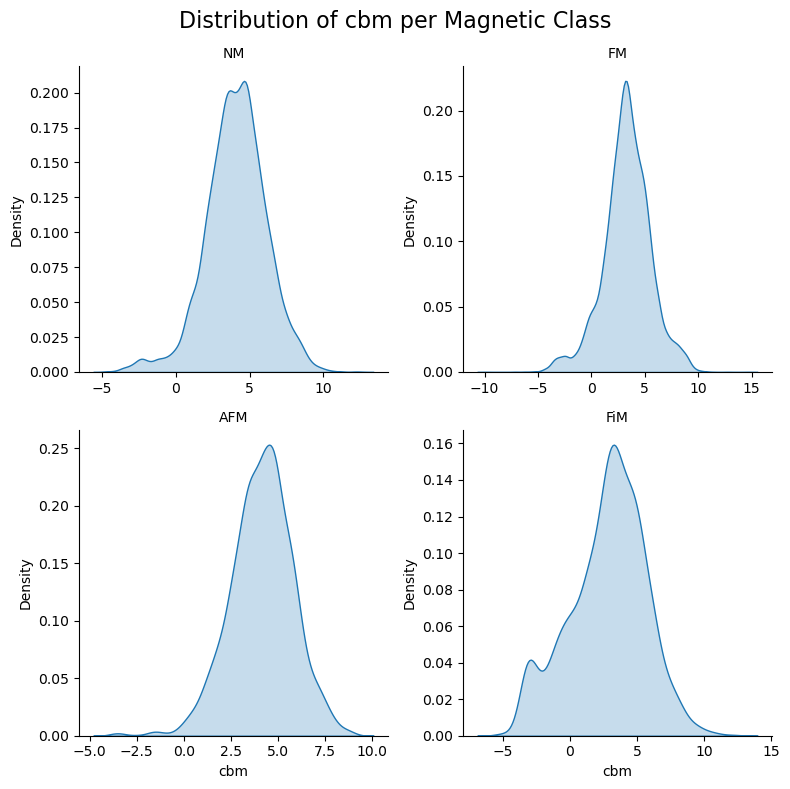

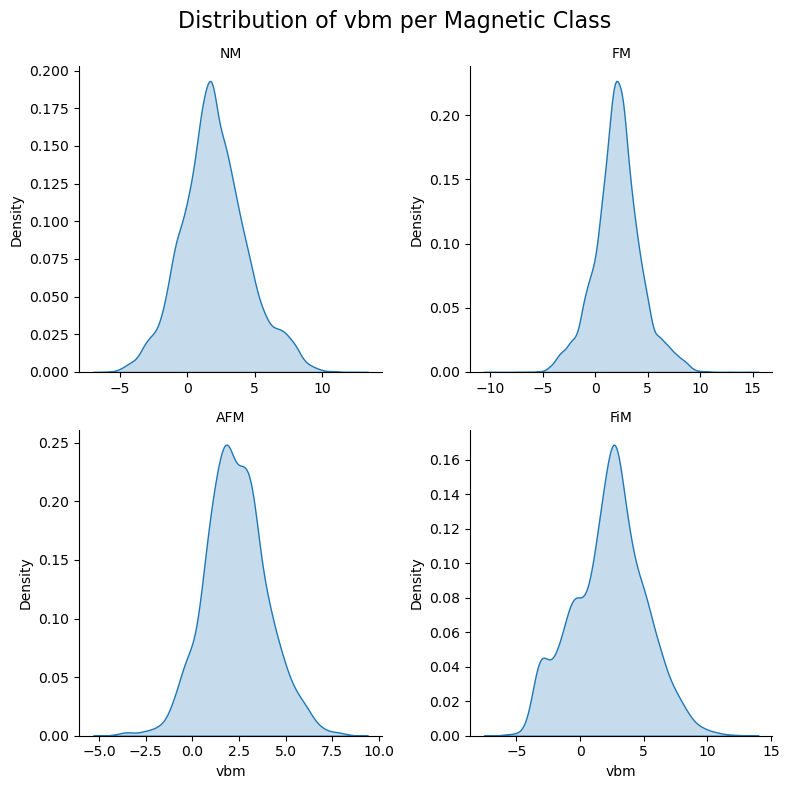

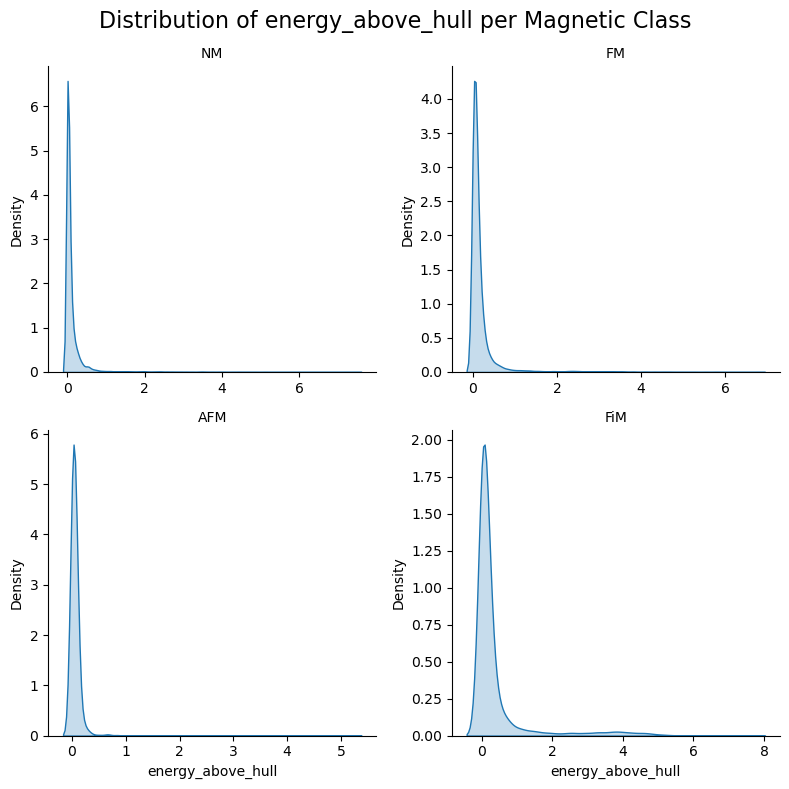

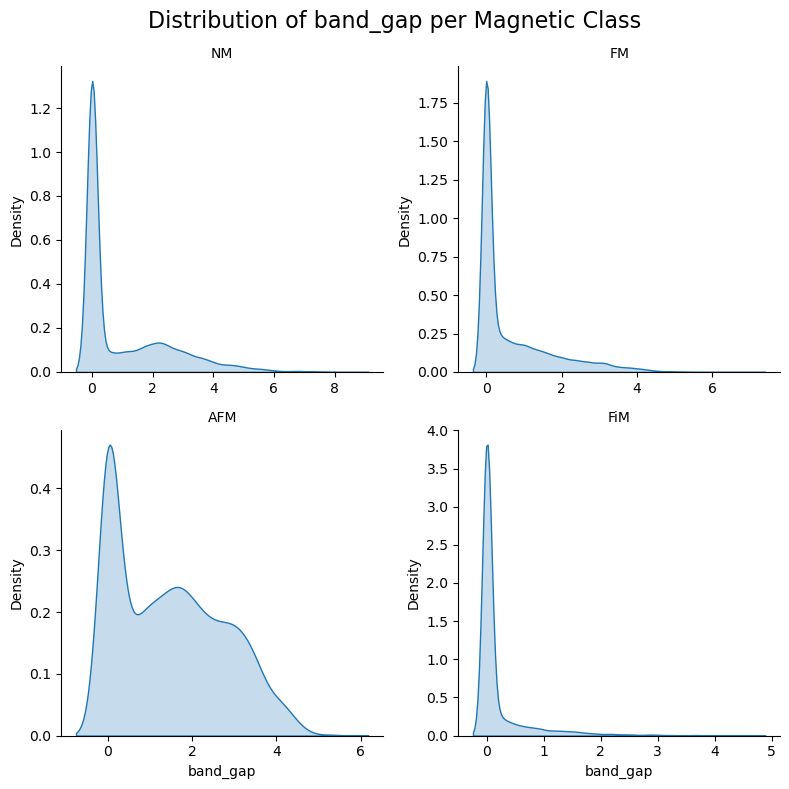

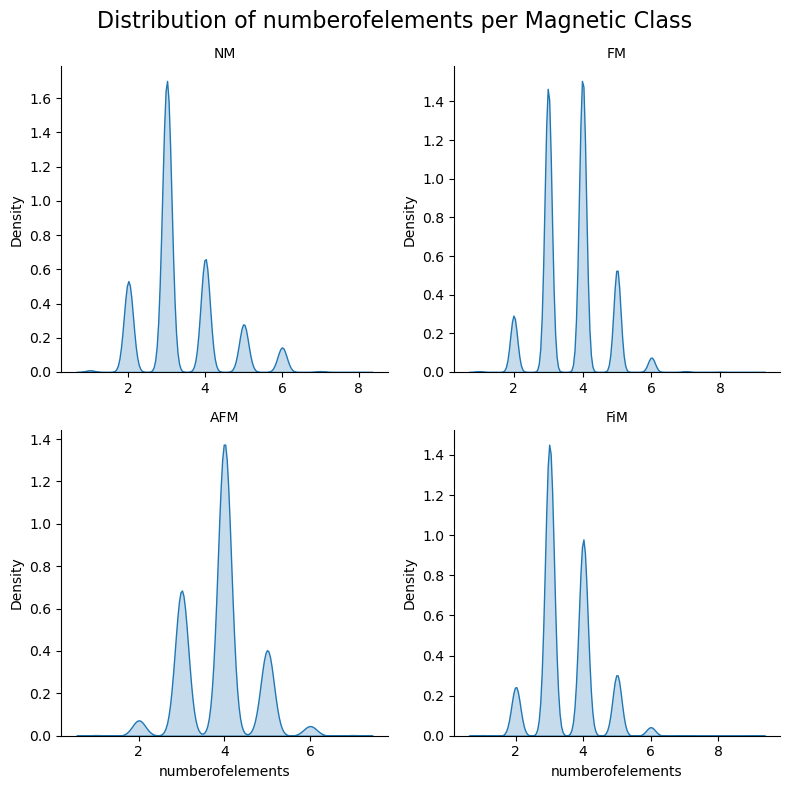

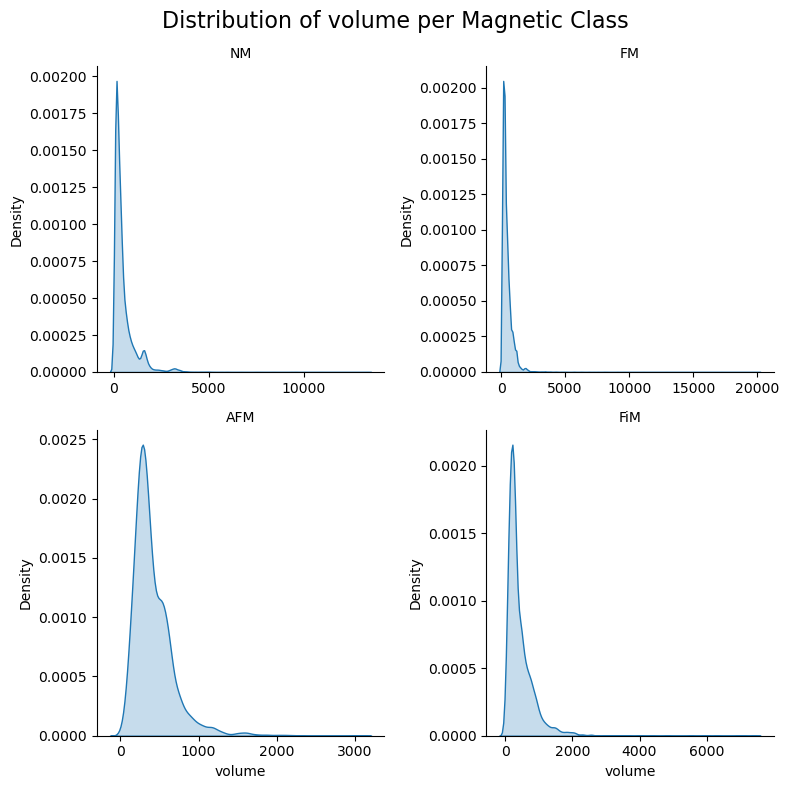

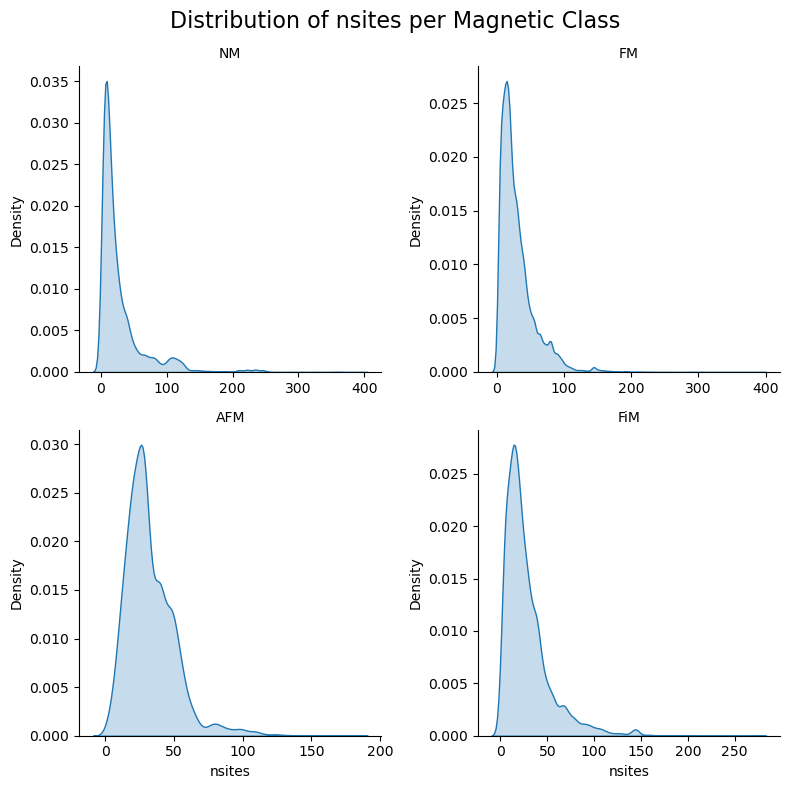

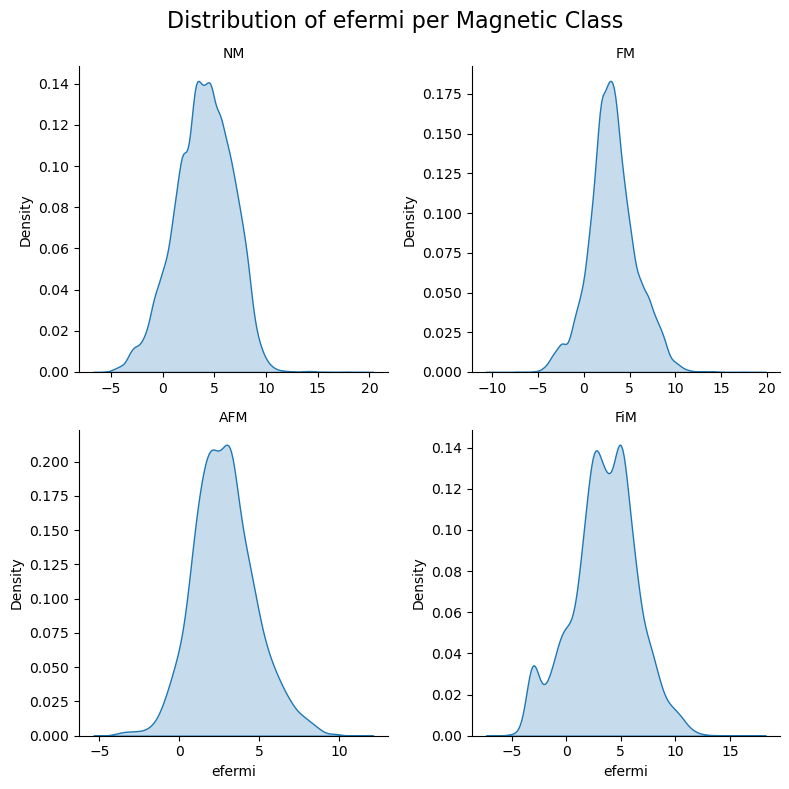

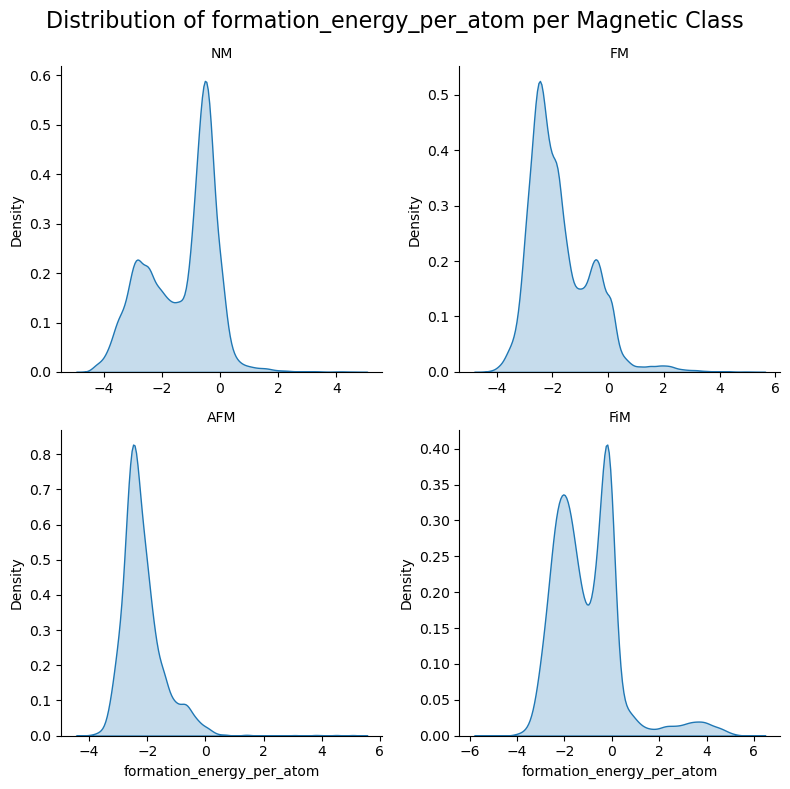

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ["cbm", "vbm", "energy_above_hull", "band_gap", "density_atomic",
            "numberofelements", "volume", "nsites", "density", "efermi", "formation_energy_per_atom"]

for feature in features:
    g = sns.FacetGrid(df, col="ordering", col_wrap=2, height=4, sharex=False, sharey=False)
    g.map(sns.kdeplot, feature, fill=True)
    g.set_titles(col_template="{col_name}")
    plt.suptitle(f"Distribution of {feature} per Magnetic Class", fontsize=16)
    plt.tight_layout()
    plt.show()


In [17]:
df.shape  # number of materials with at least one magnetic element

(107183, 22)